<a href="https://colab.research.google.com/github/PreciousGemstone/CSSI-97-Project-insert_team_name-/blob/main/Project_data_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
#@title get_data function
def get_data():
  data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
  laptop = pd.read_csv(data)
  #AI helped write this code

  def categorize_cpu(cpu_model):
      if isinstance(cpu_model, str):
          cpu_model_lower = cpu_model.lower()
          if 'core i7' in cpu_model_lower:
              return 'Core i7'
          elif 'core i5' in cpu_model_lower:
              return 'Core i5'
          elif 'core i3' in cpu_model_lower:
              return 'Core i3'
          elif 'ryzen' in cpu_model_lower:
              return 'Ryzen'
          elif 'celeron' in cpu_model_lower:
              return 'Celeron'
          elif 'atom' in cpu_model_lower:
              return 'Atom'
          elif 'xeon' in cpu_model_lower:
              return 'Xeon'
          elif 'a' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'A-Series'
          elif 'e' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'E-Series'
          elif 'fx' in cpu_model_lower:
              return 'FX-Series'
          elif 'pentium' in cpu_model_lower:
              return 'Pentium'
          elif 'core m' in cpu_model_lower:
              return 'Core M'
          elif 'cortex' in cpu_model_lower:
              return 'Cortex'
          else:
              return 'Other'
      return 'Unknown'

  laptop['CPU_categories'] = laptop['CPU_model'].apply(categorize_cpu)

  def categorize_gpu(gpu_model):
      if isinstance(gpu_model, str):
          gpu_model_lower = gpu_model.lower()
          if 'geforce gtx' in gpu_model_lower:
              return 'Nvidia GeForce GTX'
          elif 'geforce mx' in gpu_model_lower:
              return 'Nvidia GeForce MX'
          elif 'geforce' in gpu_model_lower:
              return 'Nvidia GeForce'
          elif 'quadro' in gpu_model_lower:
              return 'Nvidia Quadro'
          elif 'nvidia' in gpu_model_lower:
              return 'Nvidia (Other)'
          elif 'radeon pro' in gpu_model_lower:
              return 'AMD Radeon Pro'
          elif 'radeon' in gpu_model_lower:
              return 'AMD Radeon'
          elif 'amd' in gpu_model_lower:
              return 'AMD (Other)'
          elif 'iris plus graphics' in gpu_model_lower:
              return 'Intel Iris Plus'
          elif 'hd graphics' in gpu_model_lower:
              return 'Intel HD Graphics'
          elif 'intel' in gpu_model_lower or 'graphics' in gpu_model_lower:
              return 'Intel (Other)'
          else:
              return 'Other'
      return 'Unknown'

  laptop['GPU_categories'] = laptop['GPU_model'].apply(categorize_gpu)

  #No more AI after this

  improved_laptop=laptop.drop(['CPU_model','GPU_model'],axis=1)
  improved_laptop=improved_laptop.drop(['Product','Company','TypeName','OS', 'CPU_company', 'GPU_company'],axis=1)


  improved_laptop_preonehot = improved_laptop

  improved_laptop = pd.get_dummies(improved_laptop, columns=['CPU_categories','GPU_categories', 'Touchscreen', 'PrimaryStorageType','SecondaryStorageType',
                                                           'Screen', 'RetinaDisplay','IPSpanel'], drop_first=True, dtype=int)

  improved_laptop_noscale = improved_laptop
  laptop_prices = improved_laptop[['Price_euros']]
  improved_laptop_features = improved_laptop.drop('Price_euros', axis=1)


  improved_laptop_onehot = improved_laptop_features.drop(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],axis=1)
  improved_laptop_continous = improved_laptop_features[['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']]

  scaler = StandardScaler()
  price_scaler = StandardScaler()

  improved_laptop_continous_scaled = scaler.fit_transform(improved_laptop_continous)
  laptop_prices_scaled = price_scaler.fit_transform(laptop_prices)

  improved_laptop_continous = pd.DataFrame(improved_laptop_continous_scaled, columns= improved_laptop_continous.columns)
  laptop_prices = pd.DataFrame(laptop_prices_scaled, columns= laptop_prices.columns)

  improved_laptop = pd.concat([improved_laptop_continous, improved_laptop_onehot], axis=1)

  improved_laptop_wprice = pd.concat([laptop_prices, improved_laptop], axis=1)

  X, y = improved_laptop.values, laptop_prices.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
  return(X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale, improved_laptop_preonehot)


X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale, improved_laptop_preonehot = get_data()

In [23]:
data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
laptop = pd.read_csv(data)
laptop.info()
laptop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


Text(0, 0.5, 'Amount')

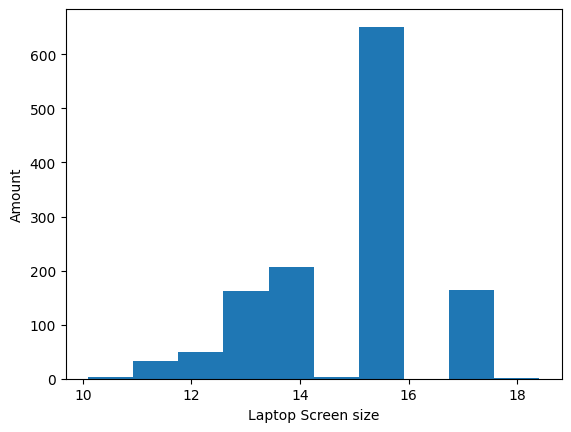

In [15]:
Inches = improved_laptop_preonehot["Inches"]

plt.hist(Inches)

plt.xlabel("Laptop Screen size")
plt.ylabel("Amount")

In [16]:
#RAM, WEIGHT, PRCE_EUROS ,

In [17]:
improved_laptop_preonehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1275 non-null   float64
 1   Ram                   1275 non-null   int64  
 2   Weight                1275 non-null   float64
 3   Price_euros           1275 non-null   float64
 4   Screen                1275 non-null   object 
 5   ScreenW               1275 non-null   int64  
 6   ScreenH               1275 non-null   int64  
 7   Touchscreen           1275 non-null   object 
 8   IPSpanel              1275 non-null   object 
 9   RetinaDisplay         1275 non-null   object 
 10  CPU_freq              1275 non-null   float64
 11  PrimaryStorage        1275 non-null   int64  
 12  SecondaryStorage      1275 non-null   int64  
 13  PrimaryStorageType    1275 non-null   object 
 14  SecondaryStorageType  1275 non-null   object 
 15  CPU_categories       

Text(0, 0.5, 'amount')

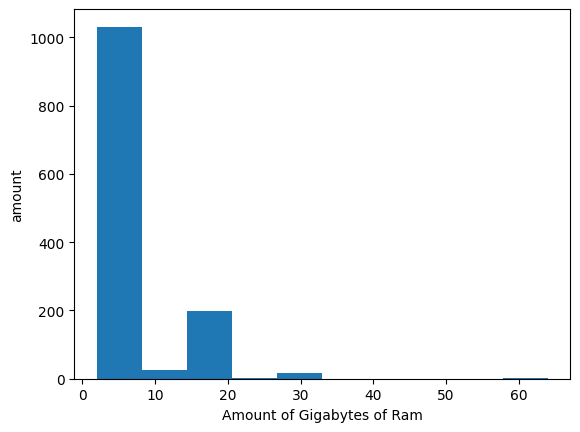

In [18]:
RAM = improved_laptop_preonehot["Ram"]

plt.hist(RAM)
plt.xlabel('Amount of Gigabytes of Ram')
plt.ylabel('amount')

Text(0.5, 0, 'Weight in Kilograms')

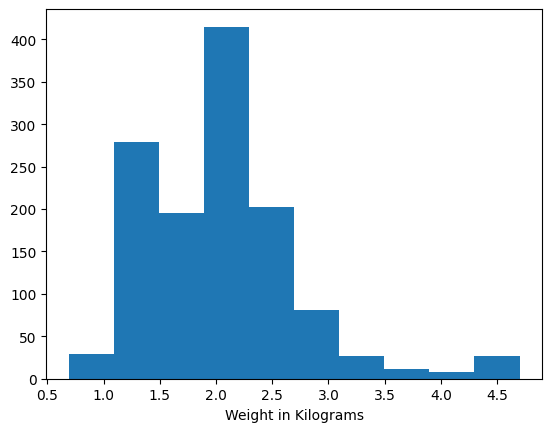

In [22]:
Weight = improved_laptop_preonehot["Weight"]

plt.hist(Weight)
plt.xlabel("Weight in Kilograms")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

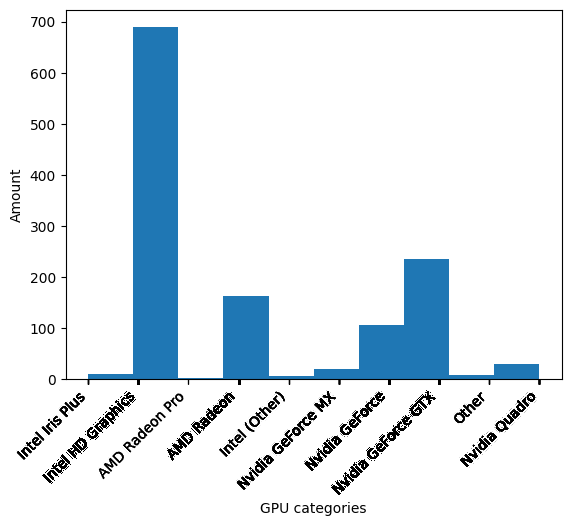

In [24]:
GPU = improved_laptop_preonehot["GPU_categories"]

plt.hist(GPU)

plt.xticks(GPU, rotation = 45, ha ='right')
plt.xlabel("GPU categories")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

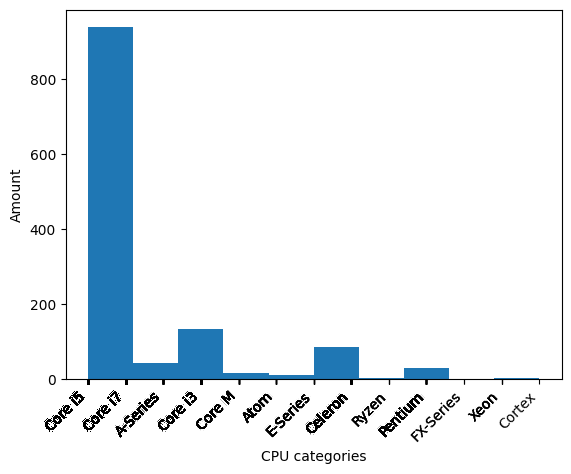

In [25]:
CPU = improved_laptop_preonehot["CPU_categories"]

plt.hist(CPU)

plt.xticks(CPU, rotation = 45, ha ='right')
plt.xlabel("CPU categories")
plt.ylabel("Amount")